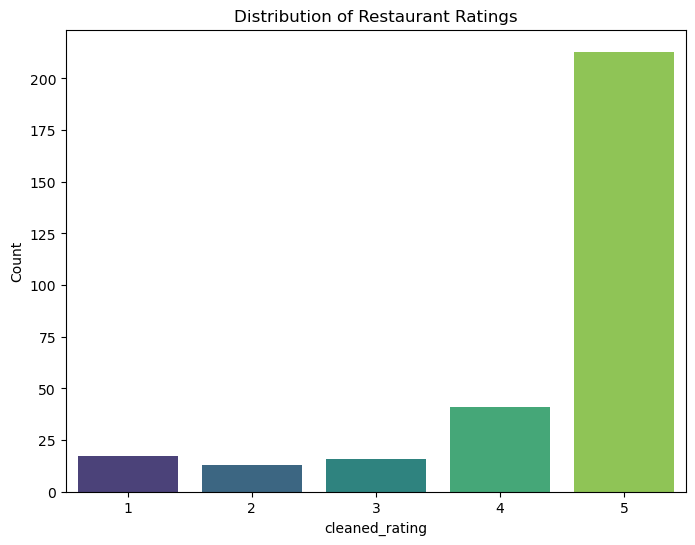

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load your cleaned data
csv_file = '../data/cleaned_restaurant_reviews.csv'
df = pd.read_csv(csv_file)

# Plot the distribution of ratings
plt.figure(figsize=(8,6))
sns.countplot(df['cleaned_rating'], palette='viridis')
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('cleaned_rating')
plt.ylabel('Count')
plt.savefig('../data/Distribution of Restaurant Rating.png')
plt.show()

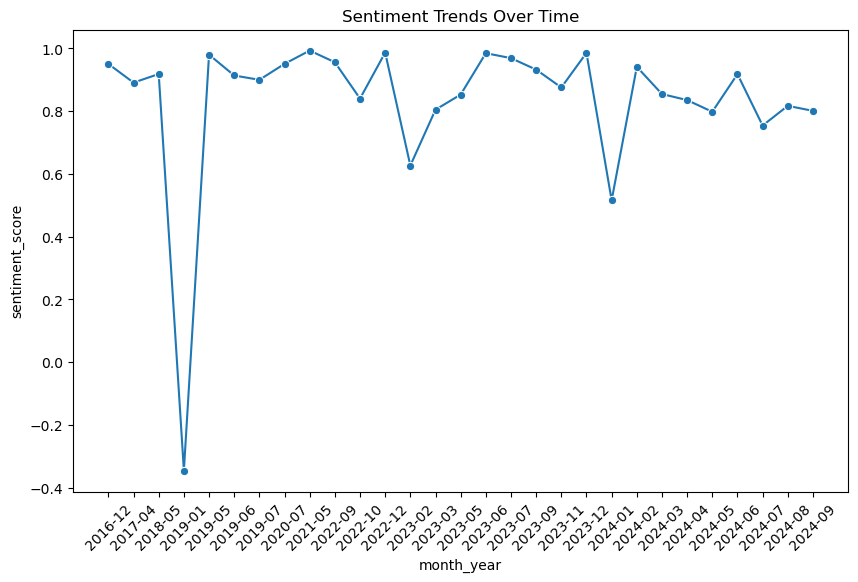

In [32]:
#Code for sentiment_trends_over_time

#df = pd.read_csv('vader_sentiment_analyzed_reviews.csv')
csv_file = '../data/vader_sentiment_analyzed_reviews.csv'
df = pd.read_csv(csv_file)

# 1. Ensure standardized date exists
df['standardized_date'] = pd.to_datetime(df['standardized_date'], errors='coerce')

# 2. Create month_year column
df['month_year'] = df['standardized_date'].dt.to_period('M')

# 3. Group by month_year and calculate average sentiment score
monthly_sentiment = df.groupby('month_year').agg({'sentiment_score': 'mean'}).reset_index()

# 4. Convert month_year to string
monthly_sentiment['month_year'] = monthly_sentiment['month_year'].astype(str)

# 5. Plot the sentiment trend
plt.figure(figsize=(10,6))
sns.lineplot(x='month_year', y='sentiment_score', data=monthly_sentiment, marker='o')
plt.xticks(rotation=45)
plt.title('Sentiment Trends Over Time')
plt.savefig('../data/Sentiment Trends Over Time.png')
plt.show()


Correlation coefficient between sentiment score and star ratings: 0.68


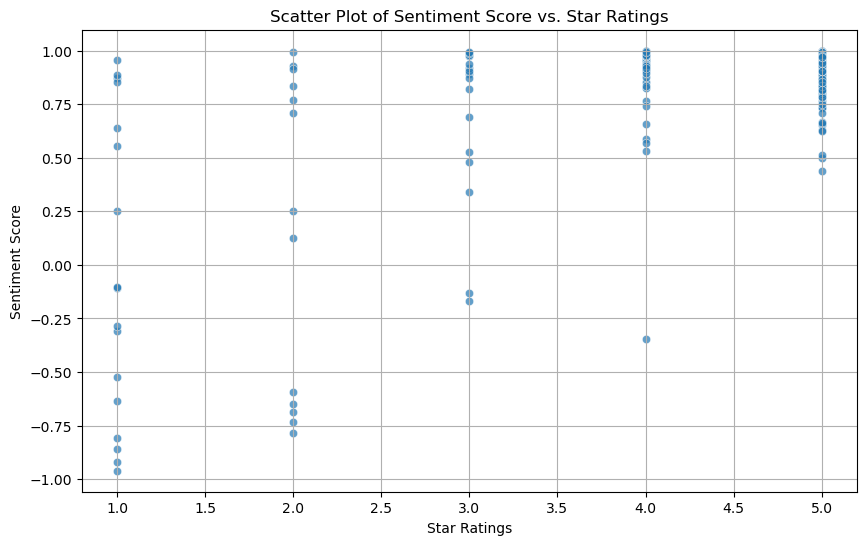

In [33]:

#Correlation between cleaned_rating and sentiment_score code.

# Step 1: Prepare the Data
# Ensure sentiment_score and star_rating are numeric and handle missing values
df['sentiment_score'] = pd.to_numeric(df['sentiment_score'], errors='coerce')
df['cleaned_rating'] = pd.to_numeric(df['cleaned_rating'], errors='coerce')

# Drop rows with NaN values in either column
df = df.dropna(subset=['sentiment_score', 'cleaned_rating'])

# Step 2: Compute the Correlation
correlation = df['sentiment_score'].corr(df['cleaned_rating'])
print(f"Correlation coefficient between sentiment score and star ratings: {correlation:.2f}")

# Step 3: Visualize the Relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='cleaned_rating', y='sentiment_score', data=df, alpha=0.7)
plt.title('Scatter Plot of Sentiment Score vs. Star Ratings')
plt.xlabel('Star Ratings')
plt.ylabel('Sentiment Score')
plt.grid(True)
plt.savefig('../data/sentiment score vs Star rating correlation.png')
plt.show()




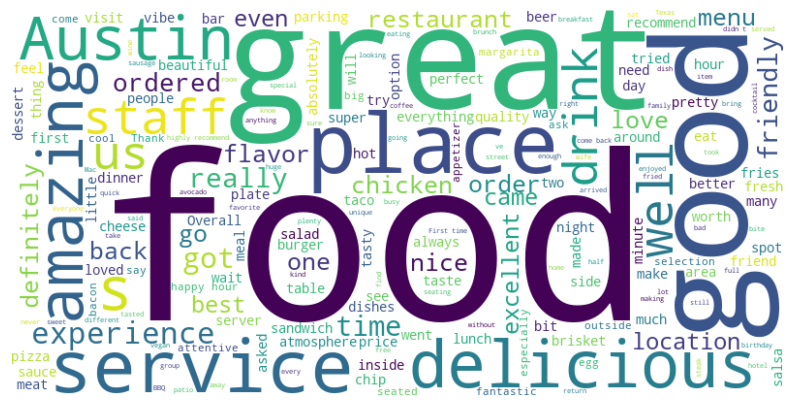

In [34]:
#wordcloud Code starts here
from wordcloud import WordCloud

# Combine all reviews into one string
all_reviews = ' '.join(df['Review Text'].astype(str))

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Plot the word cloud
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('../data/wordcloud.png')
plt.show()


In [6]:
df.to_csv('Restaurant_reviews_with_sentiment_after_EDA.csv', index=False)  # Save updated DataFrame

In [21]:
# Count the occurrences of each rating
rating_counts = df['cleaned_rating'].value_counts()

print(rating_counts)


5    213
4     41
1     17
3     16
2     13
Name: cleaned_rating, dtype: int64


In [23]:
rating_counts = {}

for rating in df['cleaned_rating']:
    if rating in rating_counts:
        rating_counts[rating] += 1
    else:
        rating_counts[rating] = 1

for rating, count in rating_counts.items():
    print(f'Rating {rating}: {count} reviews')


Rating 5: 213 reviews
Rating 4: 41 reviews
Rating 3: 16 reviews
Rating 2: 13 reviews
Rating 1: 17 reviews


In [27]:
# Filter the DataFrame for reviews with sentiment score > 0.5 and rating == 1
filtered_reviews = df[(df['sentiment_score'] > 0.5) & (df['cleaned_rating'] == 1)]

# Display the filtered reviews
filtered_reviews[['Review Text', 'sentiment_score', 'cleaned_rating']]


,Review Text,sentiment_score,cleaned_rating
163,I ordered two crispy beef tacos with rice and ...,0.5550,1
173,We went to eat at pluckers as we normally do.....,0.9552,1
174,We waited 20 minutes just to get our drinks(si...,0.6369,1
210,Cool place. Use to be great .. now they suck. ...,0.8710,1
236,"Normally I love this location, but I wanted my...",0.8546,1
248,We went to Casa de Luz last night and it was t...,0.8883,1


In [28]:
df.iloc[163].to_dict()

{'Review Text': 'I ordered two crispy beef tacos with rice and beans. We had an appetizer of chips and salsa. The chips arrived and were straight out of a bag, cold, not freshly made. Half of it was smashed into bits - bottom of the bag! We returned it for a refund. Next, the taco shells were straight from a box, not freshly fried. The ground beef had no flavor except for salt. I pulled a chunk of ground beef out that was raw on the inside. I was scared to eat the rice after this. The worst Mexican food I have ever eaten! They should be ashamed to serve it but apparently the joke is on us. After I stood up, a group of pigeons dived bombed on my plate and apparently enjoyed the plate very much. The one star is from them.',
 'standardized_date': Timestamp('2024-04-09 00:00:00'),
 'cleaned_rating': 1,
 'Restaurant': 'Marker 10 Spirits & Cuisine',
 'Address': '208 Barton Springs Rd, Austin, TX 78704, USA',
 'sentiment_score': 0.555,
 'sentiment': 'Positive',
 'month_year': Period('2024-04'

In [29]:
df.iloc[173].to_dict()

{'Review Text': "We went to eat at pluckers as we normally do.. normally everything is very delicious of course we usually go in the afternoons this time we decided to go for lunch.. it is worth mentioning that we are frequent customers at this location in Rio Grande, this time we ordered the appetizers and After 5 minutes they asked us if we were ready to order the food and we said yes although we still didn't have our apetazier... half an hour later the cold appetizers arrived completely cold, some of the fries were hard and difficult to eat... after 5 minutes the food arrived. Food also cold.. but I only told the waitress that our appetizers were cold.. then we ordered a brownie that came almost frozen and on this occasion I decided to ask to speak to the manager.. (a short girl who wears a red shirt).. she cameto our table ; I told her about the brownie with the fries and she offered to reheat the brownie... I told her no thanks and she insisted a lot and took it away ; but she cam